In [ ]:
## Data visualisation on the tweets

In [6]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from function import text_processing

In [7]:
df = pickle.load( open( "data.p", "rb" ) )
print("Shape of the data: ",df.shape)
df.head()

Shape of the data:  (1290534, 12)


userid            location  totaltweets       tweetid  \
2            1927022036  Göttingen, Germany         78.0  1.496739e+18   
7   1350117145498173441      Chennai, India       2391.0  1.496739e+18   
20           3518882836            Pakistan       6379.0  1.496739e+18   
34   995425560825417733            Honduras       1437.0  1.496739e+18   
45             25645618       New York, USA     133271.0  1.496739e+18   

    retweetcount                                           hashtags  \
2            0.0  [{'text': 'Putin', 'indices': [13, 19]}, {'tex...   
7            1.0           [{'text': 'ரஷ்யா', 'indices': [27, 33]}]   
20          29.0          [{'text': 'Mascow', 'indices': [89, 96]}]   
34        3476.0  [{'text': 'Ucrania', 'indices': [47, 55]}, {'t...   
45         227.0  [{'text': 'Russia', 'indices': [60, 67]}, {'te...   

                   extractedts    location_clean       country  \
2   2022-02-24 06:51:34.412324  gttingen germany       germany   
7   2022-02-24 06:51:34.366602     chennai india         india   
20  2022-02-24 06:51:34.247277          pakistan      pakistan   
34  2022-02-24 06:51:34.096536          honduras      honduras   
45  2022-02-24 06:51:33.879973      new york usa  united state   

                                           text_clean      tweet_datetime  \
2   die rede von ist echt gruselig russland ist fr... 2022-02-24 06:48:02   
7                      ukrainerussie america worldwar 2022-02-24 06:48:03   
20  historic moment pm pakistan mr imran khan land... 2022-02-24 06:48:04   
34  hay que bromear esto ucrania terceraguerramund... 2022-02-24 06:48:04   
45  ka armyansk crimea ukrainewar russiawar europe... 2022-02-24 06:48:05   

    tweet_date  
2   2022-02-24  
7   2022-02-24  
20  2022-02-24  
34  2022-02-24  
45  2022-02-24

In [8]:
## Find the number of tweets in one specific country
country = 'china'
print(f"Number of tweets in {country} = {df[df['country'] == country].shape[0]}")

Number of tweets in china = 5037


In [14]:
country_pop = pd.read_csv('../../data/population_by_country_2020.csv')
country_pop['name_cleaned'] = [text_processing(c) for c in country_pop['Country (or dependency)']]

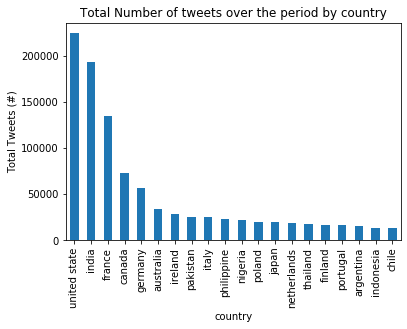

In [15]:
graph = df.groupby(['country']).count()['userid']
top_countries = graph.sort_values(ascending=False).head(20).index
graph[top_countries].plot(kind='bar')
plt.ylabel("Total Tweets (#)")
plt.title('Total Number of tweets over the period by country')
plt.show()


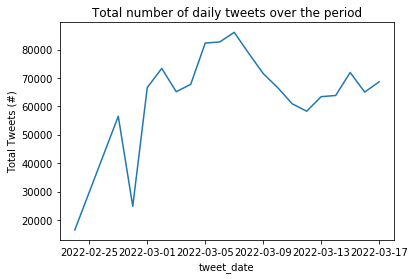

In [32]:
graph = df.groupby(['tweet_date']).count()['userid']
graph.plot()
plt.ylabel("Total Tweets (#)")
plt.title('Total number of daily tweets over the period')
plt.show()

In [16]:
## Repartition of daily tweets by country, normalize by population
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

graph = df[df['country'].isin(top_countries)]
graph = graph.groupby(['tweet_date', 'country']).count()['userid'].reset_index()
graph = graph.merge(country_pop[['name_cleaned', 'Population (2020)']], right_on='name_cleaned', left_on='country')
graph['tweet_ratio'] = graph['userid'] / graph['Population (2020)']
graph['tweet_ratio'] = scaler.fit_transform(np.array(graph['tweet_ratio']).reshape(-1,1))

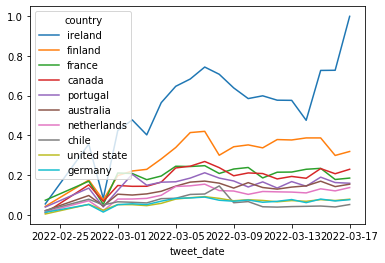

In [17]:
daily_data = graph.pivot_table(index='country', columns='tweet_date', values='tweet_ratio', aggfunc='mean')
daily_data['total'] = daily_data.sum(axis=1)
daily_data.sort_values(by='total', ascending=False).drop('total',axis=1)[:10].T.plot()

In [35]:
## Tweet with the more retweets
df.loc[df['retweetcount'] == df['retweetcount'].max()]

userid   location  totaltweets       tweetid  retweetcount  \
4452866  1296871501  Australia      20245.0  1.501323e+18      147637.0   

        hashtags                 extractedts location_clean    country  \
4452866       []  2022-03-08 22:30:35.003837      australia  australia   

                                                text_clean  \
4452866  zelenskyyuas address people moving speech ive ...   

             tweet_datetime  tweet_date  
4452866 2022-03-08 22:23:14  2022-03-08